# 그래프 탐색 알고리즘 : DFS/BFS
- 탐색(Search)이란 많은 양의 데이터 중에서 원하는 데이터를 찾는 과정을 말합니다.
- 대표적인 그래프 탐색 알고리즘으로는 DFS와 BFS가 있습니다.

## DFS (Depth-First Search)

DFS는 깊이 우선 탐색이라고도 부르며 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘.  
DFS는 스택 자료구조(혹은 재귀함수)를 이용하며, 구체적인 동작 과정은 다음과 같다.  
1. 탐색 시작 노드를 스택에 삽입하고 방문 처리를 합니다.
2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면 그 노드를 스택에 넣고 방문 처리합니다. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼냅니다.
3. 더 이상 2번의 과정을 수행 할 수 없을 때 까지 반복합니다.

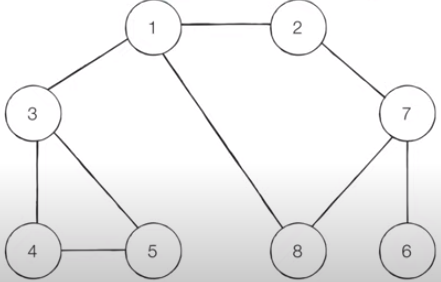

- [step 0] 그래프를 준비한다. (방문 기준 : 번호가 낮은 인접 노드부터)  
시작 노드 : 1
- [step 1] 시작 노드인 '1'을 스택에 삽입하고 방문 처리를 한다.  
- [step 2] 스택의 최상단 노드인 '1'에 방문하지 않은 인접 노드 '2','3','8'이 있다.    
이 중에서 가장 작은 노드인 '2'를 스택에 넣고 방문 처리를 한다.  
- [step 3] 스택의 최상단 노드인 '2'에 방문하지 않은 인접 노드 '7'이 있다.    
따라서 '7'번 노드를 스택에 넣고 방문 처리를 한다.
- [step 4] 스택의 최상단 노드인 '7'에 방문하지 않은 인접 노드 '6','8'이 있다.  
이 중에서 가장 작은 노드인 '6'을 스택에 넣고 방문 처리한다.  
- [step 5] 스택의 최상단 노드인 '7'에 방문하지 않은 인접 노드 '8'이 있다.  
따라서 '8'번 노드를 스택에 넣고 방문 처리를 한다.  
  
이러한 과정을 반복하였을 때 전체 노드의 탐색 순서(스택에 들어간 순서)는 다음과 같다.  
탐색 순서: 1 -> 2 -> 7 -> 6 -> 8 -> 3 -> 4 -> 5

In [13]:
#DFS 메서드 정의
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end='')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i ,visited)
        
# 각 노드가 연결된 정보를 표현 (2차원 리스트) 
# index 0 을 사용 하지 않음( 보기 좋게 하기 위해 )
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9

# 정의된 DFS 함수 호출
dfs(graph, 1, visited)

12768345

## BFS (Breadth-First Search)

BFS는 너비 우선 탐색이라고도 부르며, 그래프에서 가까운 노드부터 우선적으로 탐색하는 알고리즘 입니다.  
BFS는 큐 자료구조를 이용하며, 구체적인 동작 과정은 다음과 같습니다.  
1. 탐색 시작 노드를 큐에 삽입하고 방문 처리를 한다.
2. 큐에서 노드를 꺼낸 뒤에 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리한다.
3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복한다.  
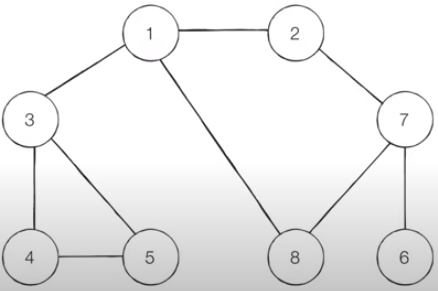  

- [step 0] 그래프를 준비한다. (방문 기준 : 번호가 낮은 인접 노드부터)  
시작 노드 : 1  
- [step 1] 시작 노드인 '1'을 큐에 삽입하고 방문 처리를 한다.
- [step 2] 큐에서 노드 '1'을 꺼내 방문하지 않은 인접 노드 '2','3','8'을 큐에 삽입하고 방문 처리한다.  
- [step 3] 큐에서 노드 '2'를 꺼내 방문하지 않은 인접 노드 '7'을 큐에 삽입하고 방문 처리한다.  
- [step 4] 큐에서 노드 '3'을 꺼내 방문하지 않은 인접 노드 '4','5'를 큐에 삽입하고 방문 처리한다.  
- [step 5] 큐에서 노드 '8'을 꺼내고 방문하지 않은 인접 노드가 없으므로 무시한다.
  
이러한 과정을 반복하여 전체 노드의 탐색 순서(큐에 들어간 순서)는 다음과 같다.  
탐색 순서 : 1 -> 2 -> 3 -> 8 -> 7 -> 4 -> 5 -> 6

각 간선의 비용이 동일한 상황에서 최단거리 문제에서 사용되기도 한다.

In [15]:
from collections import deque

# BFS 메서드 정의
def bfs(graph, start, visited):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque([start])
    # 현재 노드를 방문 처리
    visited[start] = True
    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력하기
        v = queue.popleft()
        print(v,end='')
        # 아직 방문하지 않은 인접한 원소들을 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True
                

# 각 노드가 연결된 정보를 표현 (2차원 리스트) 
# index 0 을 사용 하지 않음( 보기 좋게 하기 위해 )
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9                
                
# 정의된 BFS 함수 호출
bfs(graph, 1, visited)

12387456

## 예시 문제
## 음료수 얼려 먹기  
N x M 크기의 얼음 틀이 있습니다. 구멍이 뚫려 있는 부분은 0, 칸막이가 존재하는 부분은 1로 표시됩니다. 구멍이 뚫려 있는 부분끼리 상, 하, 좌, 우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주합니다. 이 때 얼음 틀의 모양이 주어 졌을 때 생성되는 총 아이스크림의 개수를 구하는 프로그램을 작성하세요. 다음의 4 x 5 얼음 틀 예시에서는 아이스크림이 총 3개 생성됩니다.  
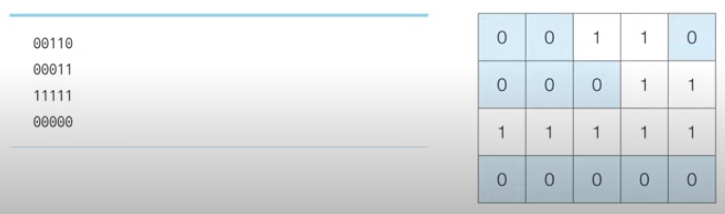




풀이 시간 30분 | 시간제한 1초 | 메모리 제한 128MB

### 입력 조건
- 첫 번째 줄에 얼음 틀의 세로 길이 N과 가로 길이 M이 주어진다. (1 <= N, M <= 1,000)
- 두 번째 줄부터 N + 1번째 줄까지 얼음 틀의 형태가 주어집니다.
- 이때 구멍이 뚫려있는 부분은 0, 그렇지 않은 부분은 1 입니다.

### 출력 조건
- 한번에 만들 수 있는 아이스크림의 개수를 출력합니다.

### 입력 예시
4 5  
00110  
00011  
11111  
00000  
### 출력 예시
3

### 해결 아이디어
이 문제는 DFS 혹은 BFS로 해결할 수 있습니다. 일단 앞에서 배운 대로 얼음을 얼릴 수 있는 공간이 상, 하, 좌, 우로 연결되어 있다고 표현할 수 있으므로 그래프 형태로 모델링 할 수 있습니다. 다음과 같이 3 x 3 크기의 얼음 틀이 있다고 가정하고 생각해 봅시다.  

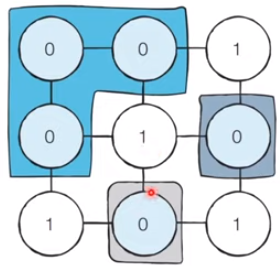


DFS를 활용하는 알고리즘은 다음과 같습니다.
1. 특정한 지점의 주변 상, 하, 좌, 우를 살펴본 뒤에 주변 지점 중에서 값이 '0'이면서 아직 방문하지 ㅁ않은 지점이 있다면 해당 지점을 방문합니다.
2. 방문한 지점에서 다시 상, 하, 좌, 우를 살펴보면서 방문을 진행하는 과정을 반복하면, 연결된 모든 지점을 방문할 수 있습니다.
3. 모든 노드에 대하여 1 ~ 2번의 과정을 반복하여, 방문하지 않은 지점의 수를 카운트합니다.


In [16]:
# N, M을 공백을 기준으로 구분하여 입력 받기
n, m = map(int, input().split())

# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

# DFS로 특정한 노드를 방문한 뒤에 연결된 모든 노드들도 방문
def dfs(x, y):
    # 주어진 범위를 벗어나는 경우에는 즉시 종료
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 0:
        # 해당 노드 방문 처리
        graph[x][y] = 1
        # 상, 하, 좌, 우의 위치들도 모두 재귀적으로 호출
        dfs(x - 1, y)
        dfs(x, y - 1)
        dfs(x + 1, y)
        dfs(x, y + 1)
        return True
    return False

# 모든 노드(위치)에 대하여 음료수 채우기
result = 0
for i in range(n):
    for j in range(m):
        # 현재 위치에서 DFS 수행
        if dfs(i, j) == True:
            result += 1

print(result) # 정답 출력

4 5
00110
00011
11111
00000
3
